In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

# Exploratory Data Analysis 

## Import the Data

In [134]:
stroke_df = pd.read_csv('./data/healthcare-dataset-stroke-data.csv')
stroke_df.drop('id', axis=1, inplace=True)
stroke_df = stroke_df[stroke_df['gender'] != 'Other']
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Describe the Data

In [59]:
stroke_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Plot Data Distribution

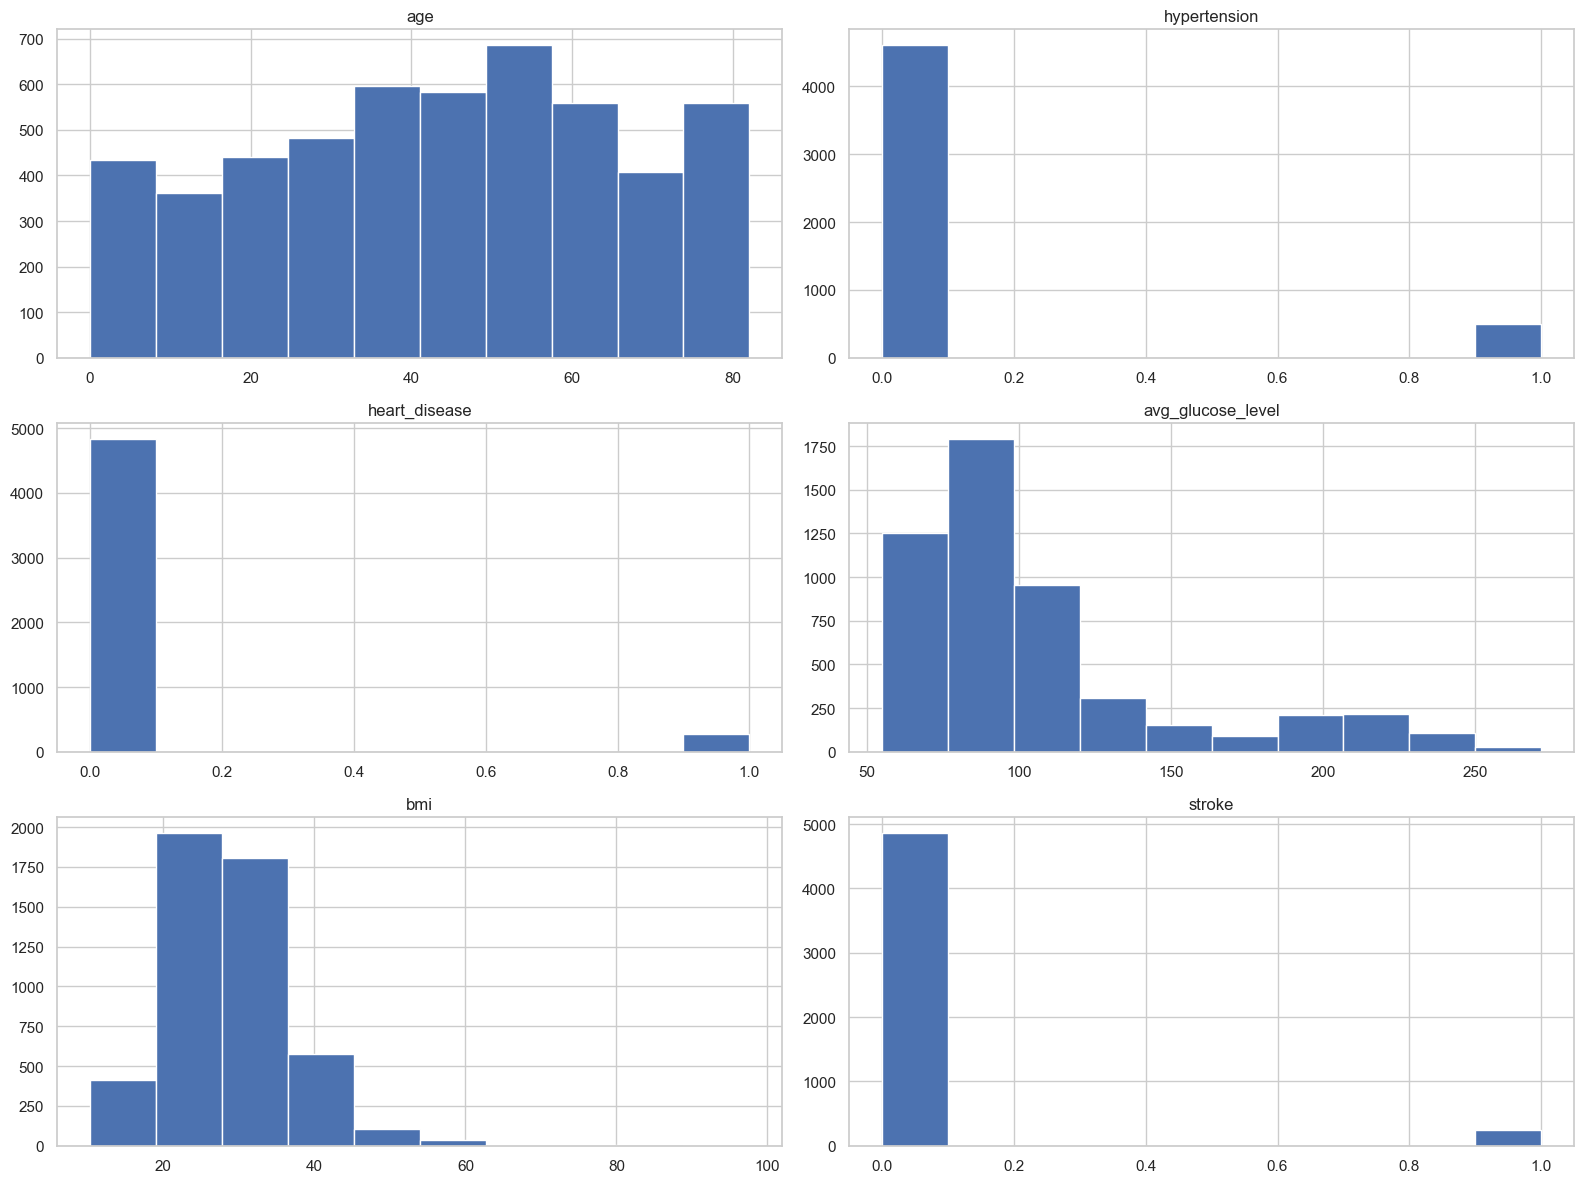

In [147]:
stroke_df.hist(figsize=(16, 12))
plt.tight_layout()
plt.show()

* On remarque que la distribution de l'âge est bimodale et incliné à droite, ce qui indique que les AVC sont plus fréquents chez les personnes âgées.
* La distribution du niveau de glucose suit une loi normale légèrement incliné vers la gauche, avec des valeurs majoritairement dans les normes.
* On observe également que la distribution de bmi (body mass indicator) suit approximativement une loi normale.

## Plot Stroke by Gender

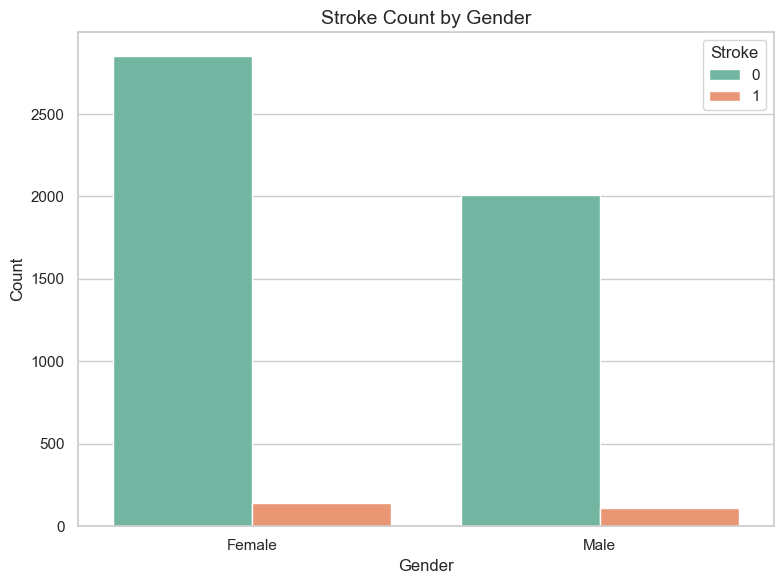

In [144]:
stroke_counts = stroke_df.groupby('gender')['stroke'].value_counts().reset_index()

# Create grouped bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=stroke_counts, x='gender', y='count', hue='stroke', palette='Set2')

# Add labels and title
plt.title('Stroke Count by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Stroke')

# Show plot
plt.tight_layout()
plt.show()

On remarque que la proportion des AVC est minimale, représentant environ 5 % des données, ce qui indique que les AVC ne sont pas très fréquents chez les êtres humains.

In [146]:
stroke_df.groupby('gender')['stroke'].value_counts(normalize=True).reset_index()

,gender,stroke,proportion
0,Female,0,0.952906
1,Female,1,0.047094
2,Male,0,0.948936
3,Male,1,0.051064


# Data Preprocessing

## Null Value

In [148]:
201/len(stroke_df)

0.039342337052260715

On remarque que la colonne `bmi` contient des valeurs nulles, environ 201 observations, soit près de 3 % des données. Pour remédier à ce problème, nous avons choisi de remplacer les valeurs manquantes par la médiane.

In [62]:
stroke_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [63]:
stroke_df['bmi'] = stroke_df['bmi'].fillna(stroke_df['bmi'].median())

In [64]:
stroke_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Duplicated Value

On remarque que le jeux de données ne présente aucun valeur dupliqué

In [65]:
stroke_df.duplicated().sum()

0

## Outliers

On remarque que le jeux de données présentent des valeur aberrante au niveau des colonnes `bmi` et `avg_glucose_level`

<Figure size 1000x1600 with 0 Axes>

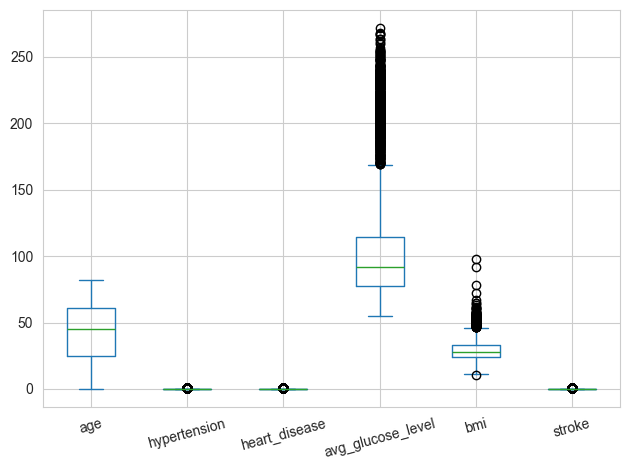

In [66]:
plt.figure(figsize=(10,16))
stroke_df.plot(kind='box')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

Pour remédier à ce problème, nous avons utilisé une transformation logarithmique, ce qui permet d’atténuer les valeurs extrêmes et de rendre les données plus cohérentes sans avoir à les supprimer.

In [67]:
def log_transform(df, cols):
    data = df.copy()
    for col in cols:
        data[col] = np.log(df[col] + df[col].min())
    return data

In [68]:
log_stroke = log_transform(stroke_df, ['bmi', 'avg_glucose_level'])

Voici les données après la transformation :

<Figure size 1000x1600 with 0 Axes>

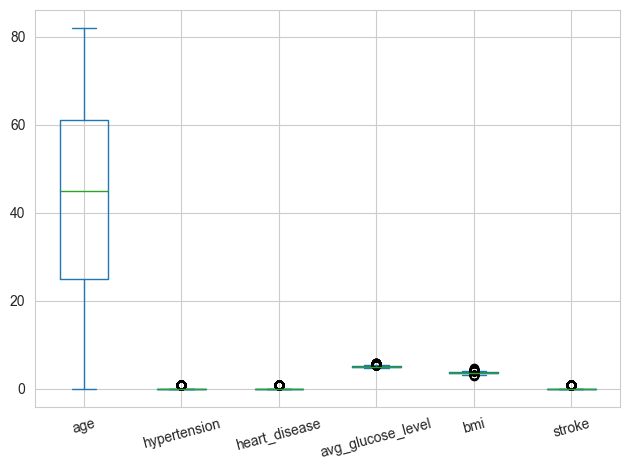

In [69]:
plt.figure(figsize=(10,16))
log_stroke.plot(kind='box')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

## Data segmentation

### Age

In [70]:
age_bins = [17, 35, 50, 65, 100]  
age_label = ['Young Adults', 'Adults', 'Middle-Aged', 'Elderly']  
log_stroke['age_segmentation'] = pd.cut(log_stroke['age'], bins=age_bins, labels=age_label)
log_stroke['age_segmentation'] = log_stroke['age_segmentation'].astype('object')

### Body Mass Indicator

In [71]:
log_bmi_bins = [0, np.log(18.5), np.log(25), np.log(30), np.inf]
bmi_labels = [
    'Underweight',
    'Normal',
    'Overweight',
    'Obese_Class'
]

log_stroke['bmi_segmentation'] = pd.cut(log_stroke['bmi'], bins=log_bmi_bins, labels=bmi_labels)
log_stroke['bmi_segmentation'] = log_stroke['bmi_segmentation'].astype('object')

### Glucose Level

In [72]:
log_glucose_bins = [0, np.log(100), np.log(125), np.log(200), np.inf]

glucose_labels = [
    'Normal',               # Normal fasting glucose
    'Prediabetes',       # Impaired fasting glucose
    'Diabetes',          # Diabetes range
    'Severe_Hyperglycemia'  # Critical/emergency range
]

log_stroke['glucose_segmentation'] = pd.cut(log_stroke['avg_glucose_level'], bins=log_glucose_bins, labels=glucose_labels)
log_stroke['glucose_segmentation'] = log_stroke['glucose_segmentation'].astype('object')

In [73]:
log_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_segmentation,bmi_segmentation,glucose_segmentation
0,Male,67.0,0,1,Yes,Private,Urban,5.648305,3.848018,formerly smoked,1,Elderly,Obese_Class,Severe_Hyperglycemia
1,Female,61.0,0,0,Yes,Self-employed,Rural,5.550359,3.648057,never smoked,1,Middle-Aged,Obese_Class,Severe_Hyperglycemia
2,Male,80.0,0,1,Yes,Private,Rural,5.081653,3.756538,never smoked,1,Elderly,Obese_Class,Diabetes
3,Female,49.0,0,0,Yes,Private,Urban,5.422082,3.799974,smokes,1,Adults,Obese_Class,Severe_Hyperglycemia
4,Female,79.0,1,0,Yes,Self-employed,Rural,5.434769,3.535145,never smoked,1,Elderly,Obese_Class,Severe_Hyperglycemia


## Data Encoding

In [74]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

to_one_hot = log_stroke.select_dtypes(include='object').columns.tolist()

transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first', sparse_output=False), to_one_hot)  
], remainder='passthrough', verbose_feature_names_out=False).set_output(transform="pandas")

stroke_transformed = transformer.fit_transform(log_stroke)

In [75]:
stroke_transformed.head()

,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,...,bmi_segmentation_Obese_Class,bmi_segmentation_Overweight,glucose_segmentation_Prediabetes,glucose_segmentation_Severe_Hyperglycemia,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,67.0,0,1,5.648305,3.848018,1
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,61.0,0,0,5.550359,3.648057,1
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,80.0,0,1,5.081653,3.756538,1
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,49.0,0,0,5.422082,3.799974,1
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,79.0,1,0,5.434769,3.535145,1


# Association Rule

pour générer des règles d'association qui aideront à identifier des relations entre différents facteurs de risque et la probabilité d'un AVC nous avons utilisé l'algorithme d'apprentissage des règles d'association `Apriori`. Ces règles d'association pourront être utilisées pour mieux comprendre quels éléments contribuent au risque d'AVC, et comment ces facteurs sont interconnectés.

Pour ce faire nous avons suivi le plan suivant :
1. Préparation des données: Les règles d'association nécessitent des attributs binaires contenant des informations indiquant si un événement ou une caractéristique spécifique concerne ou non le patient décrit. Les attributs quantitatifs doivent être transformés en ensembles correspondants d'attributs binaires. Cette étape est déja fait dans la section précedante en utilisant ***One-Hot Encoding***
2. Définition d'un paramètre de **support minimal** et génération d'ensembles d'éléments fréquents respectant le seuil de support défini. Dans notre travail, nous avons fixé le **support minimal à 0,01**, ce qui signifie que tous les ensembles fréquents, incluant au moins 51 patients, ont été générés. Les ensembles d'éléments fréquents seront générés à l'aide de l'algorithme APRIORI implémenté dans la bibliothèque mlxtend.
3. Dans notre travail, nous avons sélectionné la **lift** comme métrique et fixé sa valeur minimale à **3**. Les règles d'association seront également générées à l'aide de la bibliothèque mlxtend.
4. Sélection des règles d'association dont la conséquence est un accident vasculaire cérébral.
5. Analyse des règles les plus informatives: celles ayant la plus grande portée pour l'identification du groupe à risque et celles ayant la plus faible portée pour la définition du groupe de sécurité.
6. Division d'un ensemble de données initial en fonction d'une caractéristique sélectionnée `Gender` afin d'identifier les différences entre les règles générées sur les sous-ensembles et de mieux comprendre les facteurs de risque.
7. Génération de règles pour des sous-ensembles distincts et évaluation par un expert.

## L'ensemble des données

### Génération des itemsets avec un support = 0.01

In [76]:
apriori_stroke_df = stroke_transformed.drop(['bmi', 'avg_glucose_level', 'age'], axis=1)

In [77]:
from mlxtend.frequent_patterns import apriori, association_rules

frq_items = apriori(apriori_stroke_df, min_support = 0.01, use_colnames = True) 

In [78]:
frq_items.sort_values(by='support', ascending = False).head()

,support,itemsets
13,0.903327,(bmi_segmentation_Obese_Class)
1,0.656164,(ever_married_Yes)
48,0.645401,"(bmi_segmentation_Obese_Class, ever_married_Yes)"
2,0.572407,(work_type_Private)
62,0.557730,"(work_type_Private, bmi_segmentation_Obese_Class)"


In [79]:
frq_items.shape

(1307, 2)

### Génération des associations avec un lift >= 0.01

In [150]:
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.01) 
rules = rules.sort_values(['lift'], ascending =[False]) 
rules.sort_values(by='lift', ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
8477,"(work_type_children, glucose_segmentation_Pred...","(age_segmentation_nan, bmi_segmentation_Overwe...",0.021722,0.073581,0.013307,0.612613,8.325666,1.0,0.011709,2.391453,0.899427,0.162291,0.581844,0.396732
8476,"(age_segmentation_nan, bmi_segmentation_Overwe...","(work_type_children, glucose_segmentation_Pred...",0.073581,0.021722,0.013307,0.180851,8.325666,1.0,0.011709,1.194261,0.949775,0.162291,0.162662,0.396732
12299,"(Residence_type_Urban, age_segmentation_nan, b...","(work_type_children, gender_Male)",0.035225,0.070646,0.019961,0.566667,8.021237,1.0,0.017472,2.144664,0.907290,0.232346,0.533726,0.424608
12314,"(work_type_children, gender_Male)","(Residence_type_Urban, age_segmentation_nan, b...",0.070646,0.035225,0.019961,0.282548,8.021237,1.0,0.017472,1.344725,0.941870,0.232346,0.256353,0.424608
12303,"(Residence_type_Urban, work_type_children, gen...","(age_segmentation_nan, bmi_segmentation_Overwe...",0.036791,0.073581,0.019961,0.542553,7.373529,1.0,0.017254,2.025195,0.897395,0.220779,0.506220,0.406915


In [151]:
rules.shape

(19370, 14)

### Sélection des règles d'association dont la conséquence est un AVC

In [152]:
has_stroke = rules[rules['consequents'] == frozenset({'stroke'})]

In [155]:
has_stroke.shape

(79, 14)

In [83]:
has_stroke.head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
743,"(age_segmentation_Elderly, ever_married_Yes, b...",(stroke),0.052055,0.048728,0.011155,0.214286,4.397590,1.0,0.008618,1.210710,0.815029,0.124454,0.174038,0.221601
448,"(age_segmentation_Elderly, bmi_segmentation_Ob...",(stroke),0.055969,0.048728,0.011937,0.213287,4.377089,1.0,0.009210,1.209172,0.817280,0.128692,0.172988,0.229133
318,"(age_segmentation_Elderly, ever_married_Yes, g...",(stroke),0.052446,0.048728,0.011155,0.212687,4.364773,1.0,0.008599,1.208251,0.813561,0.123913,0.172357,0.220801


- remarque : 

In [157]:
has_stroke.tail(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
96,(work_type_Private),(stroke),0.572407,0.048728,0.029159,0.050940,1.045399,1.0,0.001266,1.002331,0.101562,0.049256,0.002326,0.324667
2392,"(bmi_segmentation_Obese_Class, smoking_status_...",(stroke),0.359491,0.048728,0.017417,0.048449,0.994266,1.0,-0.000100,0.999706,-0.008924,0.044567,-0.000294,0.202939
202,(smoking_status_never smoked),(stroke),0.370254,0.048728,0.017613,0.047569,0.976209,1.0,-0.000429,0.998783,-0.037257,0.043881,-0.001219,0.204507


- remarque :

## Per Gender

### Transformation des données en valeurs binaires 

In [93]:
male_stroke =  log_stroke[log_stroke['gender'] == 'Male']
female_stroke =  log_stroke[log_stroke['gender'] == 'Female']

In [94]:
female_stroke.shape, male_stroke.shape

((2994, 14), (2115, 14))

In [99]:
to_one_hot_male = log_stroke.drop('gender', axis=1).select_dtypes(include='object').columns.tolist()

transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first', sparse_output=False), to_one_hot_male)  
], remainder='passthrough', verbose_feature_names_out=False).set_output(transform="pandas")

stroke_transformed_male = transformer.fit_transform(male_stroke)
stroke_transformed_female = transformer.fit_transform(female_stroke)

### Génération des itemsets avec un support = 0.01

In [108]:
apriori_stroke_male_df = stroke_transformed_male.drop(['bmi', 'avg_glucose_level', 'age', 'gender'], axis=1)
apriori_stroke_female_df = stroke_transformed_female.drop(['bmi', 'avg_glucose_level', 'age', 'gender'], axis=1)

**Pour les Homme :**

In [113]:
frq_items_male = apriori(apriori_stroke_male_df, min_support = 0.01, use_colnames = True) 
frq_items_male.sort_values(by='support', ascending = False).head()

,support,itemsets
12,0.889835,(bmi_segmentation_Obese_Class)
0,0.639243,(ever_married_Yes)
28,0.634988,"(bmi_segmentation_Obese_Class, ever_married_Yes)"
1,0.553191,(work_type_Private)
42,0.544681,"(work_type_Private, bmi_segmentation_Obese_Class)"


**Pour les Femmes :**

In [114]:
frq_items_female = apriori(apriori_stroke_female_df, min_support = 0.01, use_colnames = True) 
frq_items_female.sort_values(by='support', ascending = False).head()

,support,itemsets
12,0.912826,(bmi_segmentation_Obese_Class)
0,0.668337,(ever_married_Yes)
28,0.652973,"(bmi_segmentation_Obese_Class, ever_married_Yes)"
1,0.585838,(work_type_Private)
43,0.566800,"(work_type_Private, bmi_segmentation_Obese_Class)"


### Génération des associations avec un lift >= 0.01

**Pour les Homme :**

In [119]:
# Collecting the inferred rules in a dataframe  for male
rules_male = association_rules(frq_items_male, metric ="lift", min_threshold = 3) 
rules_male = rules_male.sort_values(['lift'], ascending =[False]) 
has_stroke_male = rules_male[rules_male['consequents'] == frozenset({'stroke'})]
has_stroke_male['gender'] = 'Male'

In [120]:
has_stroke_male.head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,gender
378,"(age_segmentation_Elderly, bmi_segmentation_Ob...",(stroke),0.063357,0.051064,0.014657,0.231343,4.530473,1.0,0.011422,1.234538,0.831984,0.146919,0.189981,0.259190,Male
595,"(age_segmentation_Elderly, ever_married_Yes, b...",(stroke),0.059574,0.051064,0.013712,0.230159,4.507275,1.0,0.010669,1.232639,0.827430,0.141463,0.188732,0.249339,Male
100,"(age_segmentation_Elderly, glucose_segmentatio...",(stroke),0.063830,0.051064,0.014657,0.229630,4.496914,1.0,0.011398,1.231792,0.830645,0.146226,0.188175,0.258333,Male


- remarque : 

**Pour les Femmes :**

In [121]:
# Collecting the inferred rules in a dataframe  for male
rules_female = association_rules(frq_items_female, metric ="lift", min_threshold = 3) 
rules_female = rules_female.sort_values(['lift'], ascending =[False]) 
has_stroke_female = rules_female[rules_female['consequents'] == frozenset({'stroke'})]
has_stroke_female['gender'] = 'Female'

In [126]:
has_stroke_female.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,gender
435,"(age_segmentation_Elderly, bmi_segmentation_Ob...",(stroke),0.044088,0.047094,0.01002,0.227273,4.825919,1.0,0.007944,1.233172,0.829350,0.123457,0.189083,0.220019,Female
123,"(age_segmentation_Elderly, hypertension)",(stroke),0.044756,0.047094,0.01002,0.223881,4.753890,1.0,0.007912,1.227782,0.826643,0.122449,0.185523,0.218323,Female
426,"(age_segmentation_Elderly, bmi_segmentation_Ob...",(stroke),0.050768,0.047094,0.01002,0.197368,4.190929,1.0,0.007629,1.187227,0.802111,0.114068,0.157701,0.205067,Female
118,"(age_segmentation_Elderly, glucose_segmentatio...",(stroke),0.051102,0.047094,0.01002,0.196078,4.163538,1.0,0.007613,1.185322,0.800739,0.113636,0.156347,0.204422,Female
258,"(age_segmentation_Elderly, work_type_Private, ...",(stroke),0.085170,0.047094,0.01503,0.176471,3.747184,1.0,0.011019,1.157100,0.801387,0.128205,0.135770,0.247810,Female


- remarque

## Comparison des 5 associations fréquants pour les Hommes et les Femmes

In [128]:
has_stroke_male_female = pd.concat([has_stroke_male.head(5), has_stroke_female.head(5)])
has_stroke_male_female.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,gender
378,"(age_segmentation_Elderly, bmi_segmentation_Ob...",(stroke),0.063357,0.051064,0.014657,0.231343,4.530473,1.0,0.011422,1.234538,0.831984,0.146919,0.189981,0.259190,Male
595,"(age_segmentation_Elderly, ever_married_Yes, b...",(stroke),0.059574,0.051064,0.013712,0.230159,4.507275,1.0,0.010669,1.232639,0.827430,0.141463,0.188732,0.249339,Male
100,"(age_segmentation_Elderly, glucose_segmentatio...",(stroke),0.063830,0.051064,0.014657,0.229630,4.496914,1.0,0.011398,1.231792,0.830645,0.146226,0.188175,0.258333,Male
212,"(age_segmentation_Elderly, ever_married_Yes, g...",(stroke),0.060047,0.051064,0.013712,0.228346,4.471785,1.0,0.010645,1.229744,0.825973,0.140777,0.186822,0.248432,Male
703,"(work_type_Private, ever_married_Yes, age_segm...",(stroke),0.048700,0.051064,0.010875,0.223301,4.372977,1.0,0.008388,1.221755,0.810809,0.122340,0.181506,0.218132,Male
435,"(age_segmentation_Elderly, bmi_segmentation_Ob...",(stroke),0.044088,0.047094,0.010020,0.227273,4.825919,1.0,0.007944,1.233172,0.829350,0.123457,0.189083,0.220019,Female
123,"(age_segmentation_Elderly, hypertension)",(stroke),0.044756,0.047094,0.010020,0.223881,4.753890,1.0,0.007912,1.227782,0.826643,0.122449,0.185523,0.218323,Female
426,"(age_segmentation_Elderly, bmi_segmentation_Ob...",(stroke),0.050768,0.047094,0.010020,0.197368,4.190929,1.0,0.007629,1.187227,0.802111,0.114068,0.157701,0.205067,Female
118,"(age_segmentation_Elderly, glucose_segmentatio...",(stroke),0.051102,0.047094,0.010020,0.196078,4.163538,1.0,0.007613,1.185322,0.800739,0.113636,0.156347,0.204422,Female
258,"(age_segmentation_Elderly, work_type_Private, ...",(stroke),0.085170,0.047094,0.015030,0.176471,3.747184,1.0,0.011019,1.157100,0.801387,0.128205,0.135770,0.247810,Female
